# 배열 재구조화

In [4]:
import numpy as np
grid = np.arange(1,10).reshape((3,3))
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [7]:
x = np.array([1,2,3])
x.reshape((1,3))

array([[1, 2, 3]])

In [8]:
x[np.newaxis, :]

array([[1, 2, 3]])

In [10]:
x.reshape((3,1))

array([[1],
       [2],
       [3]])

In [11]:
x[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [12]:
x.reshape((1,1,3))

array([[[1, 2, 3]]])

In [13]:
x[np.newaxis, np.newaxis, :]

array([[[1, 2, 3]]])

In [14]:
x.reshape((1,3,1))

array([[[1],
        [2],
        [3]]])

In [15]:
x[np.newaxis, :, np.newaxis]

array([[[1],
        [2],
        [3]]])

In [16]:
x.reshape(3,1,1)

array([[[1]],

       [[2]],

       [[3]]])

In [17]:
x[:, np.newaxis, np.newaxis]

array([[[1]],

       [[2]],

       [[3]]])

In [21]:
print(x.reshape(1,1,3)[0][0][1])
print(x.reshape(1,3,1)[0][1][0])
print(x.reshape(3,1,1)[1][0][0])

2
2
2


# 배열 연결

In [24]:
x = np.array([1,2,3])
y = np.array([3,2,1])
np.concatenate([x,y])

array([1, 2, 3, 3, 2, 1])

In [25]:
np.concatenate([x,y], axis=0)

array([1, 2, 3, 3, 2, 1])

In [28]:
z = [99, 99, 99]
print(np.concatenate([x,y,z]))

[ 1  2  3  3  2  1 99 99 99]


In [33]:
grid = np.array([[1,2,3],[4,5,6]])
np.concatenate([grid,grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [34]:
np.concatenate([grid,grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [36]:
x = np.array([1,2,3])
grid = np.array([[9,8,7],[6,5,4]])
np.vstack([x,grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [37]:
y = np.array([[99],[99]])
np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

# 배열 분할

In [38]:
x = [ 1,2,3, 99, 99, 3,2,1]
x1, x2, x3 = np.split(x, [3,5])
print(x1,x2,x3)

[1 2 3] [99 99] [3 2 1]


In [40]:
grid = np.arange(16).reshape(4,4)
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [42]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [44]:
left, right = np.hsplit(grid,[2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


# 유니버설 함수 , 루프는 느리다

In [48]:
import numpy as np
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

In [49]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

2.14 s ± 87.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# UFuncs 소개

In [50]:
print(compute_reciprocals(values))
print(1.0 / values)

[0.16666667 1.         0.25       0.25       0.125     ]
[0.16666667 1.         0.25       0.25       0.125     ]


In [51]:
%timeit ( 1.0 / big_array)

3.67 ms ± 262 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [52]:
np.arange(5) / np.arange(1,6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [53]:
x = np.arange(9).reshape((3,3))
2**x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]], dtype=int32)

# Numpy 유니버설 함수(UFuncs)
## 배열 산술 연산

In [55]:
x = np.arange(4)
print(x)
print(x+5)
print(x-5)
print(x*2)
print(x/2)
print(x//2)

[0 1 2 3]
[5 6 7 8]
[-5 -4 -3 -2]
[0 2 4 6]
[0.  0.5 1.  1.5]
[0 0 1 1]


In [56]:
print(-x)
print(x**2)
print(x%2)

[ 0 -1 -2 -3]
[0 1 4 9]
[0 1 0 1]


In [58]:
-(0.5 * x + 1)  ** 2

array([-1.  , -2.25, -4.  , -6.25])

In [59]:
np.add(x, 2)

array([2, 3, 4, 5])

## 절대값 함수

In [60]:
x = np.array([-2, -1 , 0, 1,2])
abs(x)

array([2, 1, 0, 1, 2])

In [61]:
np.absolute(x)

array([2, 1, 0, 1, 2])

In [62]:
np.abs(x)

array([2, 1, 0, 1, 2])

In [63]:
x =np.array([3-4j, 4-3j, 2+0j, 0+1j])
np.abs(x)

array([5., 5., 2., 1.])

## 삼각함수

In [64]:
theta = np.linspace(0, np.pi, 3)

In [65]:
print(theta)
print(np.sin(theta))
print(np.cos(theta))
print(np.tan(theta))

[0.         1.57079633 3.14159265]
[0.0000000e+00 1.0000000e+00 1.2246468e-16]
[ 1.000000e+00  6.123234e-17 -1.000000e+00]
[ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [66]:
x = [-1, 0 , 1]
print(x)
print(np.arcsin(x))
print(np.arccos(x))
print(np.arctan(x))

[-1, 0, 1]
[-1.57079633  0.          1.57079633]
[3.14159265 1.57079633 0.        ]
[-0.78539816  0.          0.78539816]


## 지수와 로그

In [67]:
x = [1,2,3]
print(x)
print(np.exp(x))
print(np.exp2(x))
print(np.power(2,3))

[1, 2, 3]
[ 2.71828183  7.3890561  20.08553692]
[2. 4. 8.]
8


In [82]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


In [83]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


## 특화된 ufuns

In [84]:
from scipy import special

In [85]:
#감마 함수(일반화된 계승)과 관련 함수 
x = [1, 5, 10]
print("gamma(x)     =", special.gamma(x))
print("ln|gamma(x)| =", special.gammaln(x))
print("beta(x, 2)   =", special.beta(x, 2))

gamma(x)     = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| = [ 0.          3.17805383 12.80182748]
beta(x, 2)   = [0.5        0.03333333 0.00909091]


In [86]:
# 오차 함수(가우스 적분), 보수(complement), 역수(inverse)
x = np.array([0, 0.3, 0.7, 1.0])
print("erf(x)  =", special.erf(x))
print("erfc(x) =", special.erfc(x))
print("erfinv(x) =", special.erfinv(x))

erf(x)  = [0.         0.32862676 0.67780119 0.84270079]
erfc(x) = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x) = [0.         0.27246271 0.73286908        inf]


# 고급 ufuns 기능

## 출력 지정

In [88]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

[ 0. 10. 20. 30. 40.]


In [93]:
x = np.arange(5)
y = np.multiply(x,10)
print(y)

[ 0 10 20 30 40]


In [89]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


## 집계

In [94]:
x = np.arange(1, 6)
np.add.reduce(x)

15

In [95]:
np.multiply.reduce(x)

120

In [96]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15], dtype=int32)

In [97]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120], dtype=int32)

## 외적(Outer products)

In [98]:
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

# 집계: 최솟값, 최댓값, 그 사이 모든것

## 배열의 값 합계

In [100]:
import numpy as np

In [101]:
L = np.random.random(100)
sum(L)

50.461758453195614

In [102]:
np.sum(L)

50.46175845319564

In [103]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

218 ms ± 21.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.13 ms ± 126 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 최소, 최대

In [104]:
np.min(big_array), np.max(big_array)

(7.071203171893359e-07, 0.9999997207656334)

In [105]:
%timeit min(big_array)
%timeit np.min(big_array)

128 ms ± 16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.54 ms ± 269 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [106]:
print(big_array.min(), big_array.max(), big_array.sum())

7.071203171893359e-07 0.9999997207656334 500216.8034810001


## 다차원 집계

In [107]:
M = np.random.random((3, 4))
print(M)

[[0.79832448 0.44923861 0.95274259 0.03193135]
 [0.18441813 0.71417358 0.76371195 0.11957117]
 [0.37578601 0.11936151 0.37497044 0.22944653]]


In [108]:
M.sum()

5.1136763453287335

In [109]:
M.min(axis=0)

array([0.18441813, 0.11936151, 0.37497044, 0.03193135])

In [110]:
M.max(axis=1)

array([0.95274259, 0.76371195, 0.37578601])

## 예: 미국 대통령의 평균 신장은 얼마?

In [117]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [118]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


In [119]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # 플롯 스타일 설정

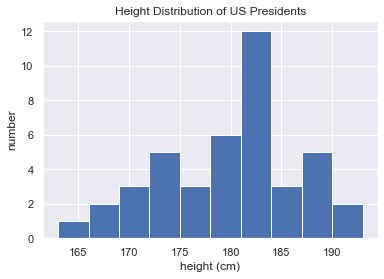

In [121]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

# 배열의 연산 : Broadcasting

## Broadcasting 소개

In [122]:
import numpy as np

In [123]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [124]:
a + 5

array([5, 6, 7])

In [125]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [126]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [127]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [128]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

## Broadcasting 규칙
- 규칙 1: 두 배열의 차원 수가 다르면 더 작은 수의 차원을 가진 배열 형상의 앞쪽을 1로 채운다.
- 규칙 2: 두 배열의 형상이 어떤 차원에서도 일치하지 않는다면 해당 차원의 형상이 1인 배열이 다른 형상과 일치하도록 늘어난다.
- 규칙 3: 임의의 차원에서 크기가 일치하지 않고 1도 아니라면 오류가 발생한다.

### Broadcasting 예1

In [129]:
M = np.ones((2, 3))
a = np.arange(3)

In [130]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

### Broadcasting 예2

In [132]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

In [133]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Broadcasting 예 3

In [135]:
M = np.ones((3, 2))
a = np.arange(3)

In [136]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [137]:
a[:, np.newaxis].shape

(3, 1)

In [138]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

In [139]:
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

## Broadcating 연습

### 배열 중앙 정렬

In [140]:
X = np.random.random((10, 3))

In [141]:
Xmean = X.mean(0)
Xmean

array([0.49831076, 0.50193438, 0.46752888])

In [142]:
X_centered = X - Xmean

In [143]:
X_centered.mean(0)

array([-4.44089210e-17,  3.33066907e-17, -9.43689571e-17])

### 2차원 함수 플로팅

In [45]:
#  x와 y는 0에서 5까지 50 단계로 나눈 배열임
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [46]:
import matplotlib.pyplot as plt

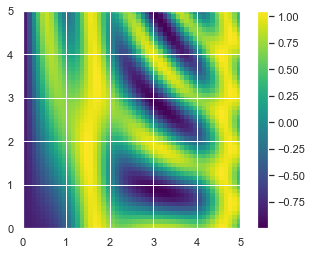

In [47]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();

# 비교, 마스크, Boolean 로직

## 예: 비오는 날 계산

In [49]:
import numpy as np
import pandas as pd

# 팬더스를 이용하여 강수량 인치 데이터를 넘파이 배열로 추출
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

(365,)

In [42]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # 플롯 양식 설정

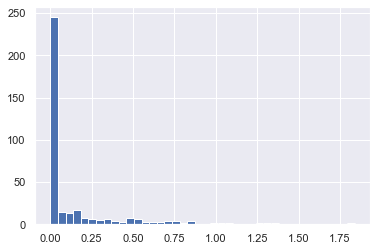

In [6]:
plt.hist(inches, 40);

## ufuns 비교 연산

In [7]:
x = np.array([1, 2, 3, 4, 5])

In [8]:
x < 3 

array([ True,  True, False, False, False])

In [9]:
x > 3

array([False, False, False,  True,  True])

In [10]:
x <= 3

array([ True,  True,  True, False, False])

In [11]:
x >= 3

array([False, False,  True,  True,  True])

In [12]:
x != 3

array([ True,  True, False,  True,  True])

In [13]:
x == 3

array([False, False,  True, False, False])

In [14]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

In [15]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [16]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

# Boolean 배열 working

In [17]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


### 요소 카운팅

In [18]:
np.count_nonzero(x < 6)

8

In [19]:
np.sum(x < 6)

8

In [20]:
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [21]:
np.any(x > 8)

True

In [22]:
np.any(x < 0)

False

In [23]:
np.all(x < 10)

True

In [24]:
np.all(x == 6)

False

In [25]:
np.all(x<8, axis=1)

array([ True, False,  True])

### Bool 연산자

In [26]:
np.sum((inches>0.5) &(inches <1))

29

In [30]:
np.sum(~((inches<=0.5) |(inches >=1)))

29

In [36]:
print(np.sum(inches==0))
print(np.sum(inches!=0))
print(np.sum(inches>0.5))
print(np.sum((inches>0)&(inches<0.2)))

215
150
37
75


### 마스크로서의 bool 배열

In [37]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [38]:
x <5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [39]:
x[x<5]

array([0, 3, 3, 3, 2, 4])

In [41]:
rainy = (inches > 0)
summer = (np.arange(365)-172 <90)&(np.arange(365)-172 >0)
print(np.median(inches[rainy]))
print(np.median(inches[summer]))
print(np.max(inches[summer]))
print(np.median(inches[rainy & ~summer]))

0.19488188976377951
0.0
0.8503937007874016
0.20078740157480315


###  키워드 and/or vs &| 사용

In [50]:
bool(42), bool(0)

(True, False)

In [51]:
bool(42 and 0)

False

In [52]:
bool(42 or 0)

True

In [53]:
bin(42)

'0b101010'

In [54]:
bin(59)

'0b111011'

In [55]:
bin(42 & 59)

'0b101010'

In [56]:
bin(42 | 59)

'0b111011'

In [57]:
A = np.array([1,0,1,0,1,0], dtype=bool)
B = np.array([1,1,1,0,1,1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [58]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [59]:
x = np.arange(10)
(x>4)&(x<8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

# 팬시 인덱싱

## 팬시 인덱싱 알아보기

In [165]:
import numpy as np
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [166]:
[x[3],x[7],x[2]]

[71, 86, 14]

In [167]:
ind = [3,7,4]
x[ind]

array([71, 86, 60])

In [168]:
ind = np.array([[3,7],[4,5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [169]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [170]:
row = np.array([0,1,2])
col = np.array([2,1,3])
X[row, col]

array([ 2,  5, 11])

In [171]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [172]:
row[:, np.newaxis]*col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

## 결합 인덱싱

In [173]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [174]:
X[2, [2,0,1]]

array([10,  8,  9])

In [175]:
X[1: , [2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [176]:
mask = np.array([1,0,1,0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [177]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [178]:
row[:,np.newaxis]

array([[0],
       [1],
       [2]])

In [179]:
row

array([0, 1, 2])

## 예 : 임의의 점 선택

In [79]:
mena = [0,0]
cov= [[1,2],[2,5]]
X = rand.multivariate_normal(mena,cov,100)
X.shape

(100, 2)

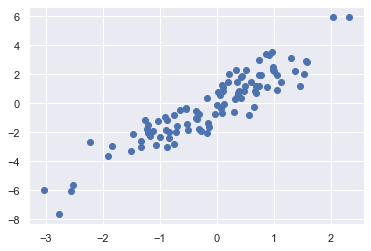

In [81]:
import matplotlib.pyplot as pt
import seaborn; seaborn.set()
plt.scatter(X[:,0], X[:,1])

In [85]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([91, 90, 64, 38, 54, 57, 59, 95, 78,  4, 82,  2, 99, 68, 84, 65, 80,
       72, 75, 30])

In [87]:
selection = X[indices]
selection.shape

(20, 2)

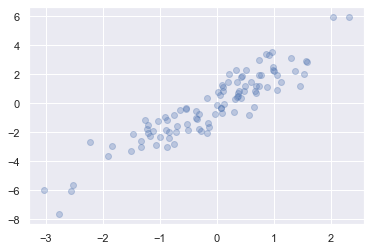

In [88]:
plt.scatter(X[:, 0],X[:,1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:,1], facecolor='none',s=200)

## 팬시 인덱싱으로 값 변경

In [89]:
x = np.arange(10)
i = np.array([2,1,8,4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [90]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [92]:
x = np.zeros(10)
x[[0,0]] = [4,6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [93]:
i = [2,3,3,4,4,4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [94]:
x = np.zeros(10)
np.add.at(x,i,1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


## 예: 데이터 구간화

In [104]:
np.random.seed(42)
x = np.random.randn(100)

# 직접 히스토그램 계산하기
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# 각 x에 대해 적절한 구간 찾기
i = np.searchsorted(bins, x)

# 이 구간 각각에 1 더하기
np.add.at(counts, i, 1)

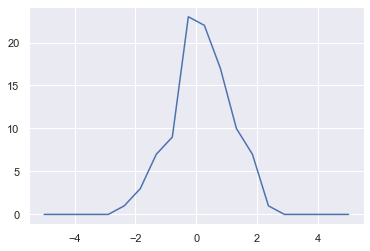

In [110]:
# 결과 플로팅하기
plt.plot(bins, counts)

In [112]:
%timeit counts, edges = np.histogram(x, bins)
%timeit np.add.at(counts, np.searchsorted(bins,x), 1)

18.5 µs ± 267 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
11.2 µs ± 312 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [113]:
x = np.random.randn(100000)
%timeit counts, edges = np.histogram(x, bins)
%timeit np.add.at(counts, np.searchsorted(bins,x), 1)

5.39 ms ± 84.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.32 ms ± 52.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 배열 정렬

In [114]:
import numpy as np
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap],x[i])
    return x

In [115]:
x = np.array([2,1,4,3,5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [117]:
def bogosort(x):
    while np.any(x[:1]>x[1:]):
        np.random.shuffle(x)
    return x

In [119]:
x = np.array([2,1,4,3,5])
bogosort(x)

array([1, 2, 3, 4, 5])

In [120]:
x = np.array([2,1,4,3,5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [121]:
x.sort()
print(x)

[1 2 3 4 5]


In [122]:
x = np.array([2,1,4,3,5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [123]:
x[i]

array([1, 2, 3, 4, 5])

## 행이나 열 기준으로 정렬

In [124]:
rand = np.random.RandomState(42)
X = rand.randint(0,10,(4,6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [125]:
np.sort(X ,axis=0) #열을 정렬

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [126]:
np.sort(X, axis=1) #행을 정렬

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

## 부분 정렬 : 파티션 나누기

In [127]:
x = np.array([7,2,3,1,6,5,4])
np.partition(x,3)

array([2, 1, 3, 4, 6, 5, 7])

In [129]:
np.partition(X, 2 , axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

## 예: k최근접 이웃 알고리즘

In [131]:
X = rand.rand(10,2)

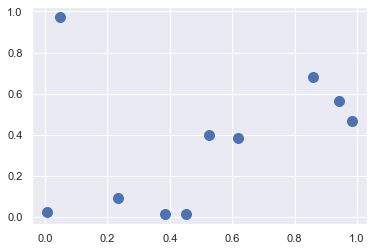

In [134]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:,0], X[:,1],s=100)

In [135]:
dist_sq = np.sum((X[:,np.newaxis,:]-X[np.newaxis,:,:])**2, axis=-1)

In [136]:
difference = X[:, np.newaxis, :]- X[np.newaxis, :, :]
difference.shape

(10, 10, 2)

In [138]:
sq_differences = difference ** 2
sq_differences.shape

(10, 10, 2)

In [139]:
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [140]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [141]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


In [142]:
K = 2
nearest_partition = np.argpartition(dist_sq, K+1, axis=1)

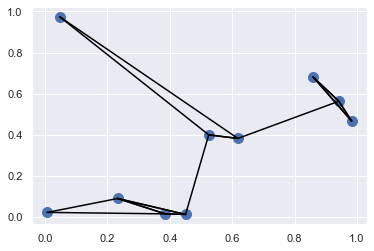

In [144]:
plt.scatter(X[:,0],X[:,1],s=100)

K=2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')

## Numpy의 구조화된 배열

In [145]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25,45,37,19]
weight = [55.0, 85.5, 68.0, 61.5]

In [146]:
x = np.zeros(4, dtype=int)

In [147]:
data = np.zeros(4, dtype={'names':('name','age','weight'),'formats':('U10','i4','f8')})
print(data.dtype)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


In [148]:
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


In [149]:
data['name']

array(['Alice', 'Bob', 'Cathy', 'Doug'], dtype='<U10')

In [150]:
data[0]

('Alice', 25, 55.)

In [151]:
data[-1]['name']

'Doug'

In [152]:
data[data['age']<30]['name']

array(['Alice', 'Doug'], dtype='<U10')

## 구조화 된 배열 만들기

In [153]:
np.dtype({'names':('name','age','weight'),'formats':('U10','i4','f8')})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [154]:
np.dtype({'names':('name','age','weight'),'formats':((np.str_,10),int,np.float32)})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f4')])

In [155]:
np.dtype([('name','S10'),('age','i4'),('weight','f8')])

dtype([('name', 'S10'), ('age', '<i4'), ('weight', '<f8')])

In [157]:
np.dtype('S10,i4,f8')

dtype([('f0', 'S10'), ('f1', '<i4'), ('f2', '<f8')])

## 고급 복합 타입

In [160]:
tp = np.dtype([('id','i8'),('mat','f8', (3,3))])
X = np.zeros(1, dtype=tp)
print(X[0])
print(X['mat'][0])

(0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


## 레코드 배열 : 트위스트를 가진 구조화된 배열

In [161]:
data['age']

array([25, 45, 37, 19])

In [162]:
data_rec = data.view(np.recarray)
data_rec.age

array([25, 45, 37, 19])

In [163]:
%timeit data['age']
%timeit data_rec['age']
%timeit data_rec.age

78.1 ns ± 5.54 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
2.05 µs ± 158 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
2.83 µs ± 179 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
